<a href="https://colab.research.google.com/github/Piyush434/parkinson-with-speech-analysis-final/blob/main/Major_Project_Exam_Final_Sem_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd

In [3]:
prkn = pd.DataFrame(pd.read_csv("/content/drive/My Drive/pd_features_lat.csv"))

In [4]:
nRow, nCol = prkn.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1245 rows and 755 columns


In [5]:
prkn.head(5)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
prkn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 7.2 MB


In [7]:
prkn.iloc[0:10,-1]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: class, dtype: int64

In [8]:
prkn.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [9]:
prkn['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

# Features and Labels

In [10]:
X=prkn.iloc[:,:-1]
y=prkn.iloc[:,-1]

In [11]:
X.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


In [12]:
X.iloc[:,2:].head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X.iloc[:,2:]=scaler.fit_transform(X.iloc[:,2:])

In [14]:
X.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0,1,0.936278,0.565310,0.583000,0.262983,0.263274,0.548552,0.021947,0.071532,...,0.000576,0.000219,0.005515,0.019054,0.024520,0.039777,0.039411,0.012611,0.018790,0.107598
1,0,1,0.837434,0.489455,0.537514,0.256354,0.256637,0.566485,0.018001,0.063181,...,0.000594,0.000206,0.010303,0.182833,0.123920,0.110245,0.109584,0.077525,0.078923,0.277905
2,0,1,0.934385,0.428738,0.607479,0.254144,0.254425,0.573975,0.014344,0.056282,...,0.000557,0.000229,0.003960,0.065964,0.089574,0.110145,0.044197,0.017594,0.021472,0.015595
3,1,0,0.426804,0.819111,0.611315,0.194475,0.194690,0.805881,0.049580,0.144517,...,0.015906,0.009530,0.010084,0.030618,0.122368,0.029052,0.042515,0.049618,0.077518,0.011011
4,1,0,0.330615,0.822669,0.524431,0.258564,0.258850,0.557581,0.765643,0.186638,...,0.018467,0.019569,0.021359,0.037492,0.039965,0.071521,0.139915,0.105554,0.055767,0.024357


# Feature Importance and Selection

In [15]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)

In [16]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [17]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(150,'Score'))

                         Feature      Score
743    tqwt_kurtosisValue_dec_26  57.095192
744    tqwt_kurtosisValue_dec_27  51.004642
745    tqwt_kurtosisValue_dec_28  34.699919
333           tqwt_energy_dec_12  32.015731
373  tqwt_entropy_shannon_dec_16  31.597606
..                           ...        ...
35             GQ_std_cycle_open   5.417283
599         tqwt_stdValue_dec_26   5.414624
456        tqwt_TKEO_mean_dec_27   5.377096
11                     rapJitter   5.315042
13                     ddpJitter   5.288279

[150 rows x 2 columns]


In [18]:
selected_features=featureScores.nlargest(150,'Score')['Feature']

In [19]:
X[selected_features].head()

,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_energy_dec_12,tqwt_entropy_shannon_dec_16,tqwt_entropy_shannon_dec_11,tqwt_entropy_shannon_dec_15,tqwt_kurtosisValue_dec_25,tqwt_stdValue_dec_11,tqwt_entropy_shannon_dec_14,...,std_MFCC_8th_coef,tqwt_entropy_shannon_dec_7,locAbsJitter,tqwt_TKEO_std_dec_34,app_TKEO_std_3_coef,GQ_std_cycle_open,tqwt_stdValue_dec_26,tqwt_TKEO_mean_dec_27,rapJitter,ddpJitter
0,0.000313,0.000576,0.000219,0.002224,0.100223,0.007532,0.082589,0.001415,0.052966,0.036967,...,0.074763,0.003072,0.066124,0.000035,0.027237,0.051857,0.142322,0.026534,0.058930,0.058912
1,0.000241,0.000594,0.000206,0.002807,0.086438,0.007476,0.066563,0.001529,0.053197,0.027167,...,0.069459,0.001444,0.060259,0.000093,0.025144,0.062779,0.111289,0.019228,0.045331,0.045921
2,0.000279,0.000557,0.000229,0.002310,0.053661,0.003058,0.040071,0.004916,0.031539,0.016052,...,0.155334,0.001167,0.054786,0.000050,0.023733,0.130781,0.075310,0.009282,0.049864,0.050151
3,0.001017,0.015906,0.009530,0.006898,0.342319,0.004941,0.270988,0.001152,0.046091,0.167116,...,0.199446,0.005473,0.175196,0.011494,0.089732,0.715580,0.334728,0.001330,0.133273,0.133233
4,0.001015,0.018467,0.019569,0.006338,0.361451,0.004188,0.306133,0.000721,0.039795,0.188448,...,0.158506,0.004605,0.168159,0.008744,0.111507,0.520801,0.355776,0.000756,0.148685,0.149245


#Train and Split

In [20]:
X[selected_features].shape

(1245, 150)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.33, random_state=42)

In [22]:
X_train.shape

(834, 150)

In [23]:
X_test.shape

(411, 150)

In [24]:
from sklearn.metrics import accuracy_score

# SVM From Scratch


In [25]:
class SVM:
    def __init__(self, iterations=1000, lr=0.01, lambdaa=0.01):
        self.lambdaa = lambdaa
        self.iterations = iterations
        self.lr = lr
        self.w = None
        self.b = None
    def initialize_parameters(self,X):

        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
    def gradient_descent(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        for i, x in enumerate(X):
            if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                dw = 2 * self.lambdaa * self.w
                db = 0
            else:
                dw = 2 * self.lambdaa * self.w - np.dot(x, y_[i])
                db = y_[i]

            self.update_parameters(dw,db)
    def update_parameters(self, dw, db):

        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db
    def fit(self, X, y):
        self.initialize_parameters(X)
        for i in range(self.iterations):
            self.gradient_descent(X,y)
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        label_signs = np.sign(output)
        predictions = np.where(label_signs <= -1, 0, 1)
        return predictions

In [26]:
svm_sratch = SVM()
svm_sratch.fit(X_train.to_numpy(), y_train.to_numpy())
y_test_predicted = svm_sratch.predict(X_test.to_numpy())

In [27]:

svm_acc = accuracy_score(y_test,y_test_predicted)
print(svm_acc)

0.8491484184914841


#Decision Tree Implementation From Scratch


In [28]:
prkn = pd.DataFrame(pd.read_csv("/content/drive/My Drive/pd_features_lat.csv"))

In [29]:
X=prkn.iloc[:,:-1]
y=prkn.iloc[:,-1]

In [30]:
X.iloc[:,2:].head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X.iloc[:,2:]=scaler.fit_transform(X.iloc[:,2:])

In [32]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)

In [33]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [34]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(150,'Score'))

                         Feature      Score
743    tqwt_kurtosisValue_dec_26  57.095192
744    tqwt_kurtosisValue_dec_27  51.004642
745    tqwt_kurtosisValue_dec_28  34.699919
333           tqwt_energy_dec_12  32.015731
373  tqwt_entropy_shannon_dec_16  31.597606
..                           ...        ...
35             GQ_std_cycle_open   5.417283
599         tqwt_stdValue_dec_26   5.414624
456        tqwt_TKEO_mean_dec_27   5.377096
11                     rapJitter   5.315042
13                     ddpJitter   5.288279

[150 rows x 2 columns]


In [35]:
selected_features=featureScores.nlargest(150,'Score')['Feature']

In [36]:
X[selected_features].head()

,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_energy_dec_12,tqwt_entropy_shannon_dec_16,tqwt_entropy_shannon_dec_11,tqwt_entropy_shannon_dec_15,tqwt_kurtosisValue_dec_25,tqwt_stdValue_dec_11,tqwt_entropy_shannon_dec_14,...,std_MFCC_8th_coef,tqwt_entropy_shannon_dec_7,locAbsJitter,tqwt_TKEO_std_dec_34,app_TKEO_std_3_coef,GQ_std_cycle_open,tqwt_stdValue_dec_26,tqwt_TKEO_mean_dec_27,rapJitter,ddpJitter
0,0.000313,0.000576,0.000219,0.002224,0.100223,0.007532,0.082589,0.001415,0.052966,0.036967,...,0.074763,0.003072,0.066124,0.000035,0.027237,0.051857,0.142322,0.026534,0.058930,0.058912
1,0.000241,0.000594,0.000206,0.002807,0.086438,0.007476,0.066563,0.001529,0.053197,0.027167,...,0.069459,0.001444,0.060259,0.000093,0.025144,0.062779,0.111289,0.019228,0.045331,0.045921
2,0.000279,0.000557,0.000229,0.002310,0.053661,0.003058,0.040071,0.004916,0.031539,0.016052,...,0.155334,0.001167,0.054786,0.000050,0.023733,0.130781,0.075310,0.009282,0.049864,0.050151
3,0.001017,0.015906,0.009530,0.006898,0.342319,0.004941,0.270988,0.001152,0.046091,0.167116,...,0.199446,0.005473,0.175196,0.011494,0.089732,0.715580,0.334728,0.001330,0.133273,0.133233
4,0.001015,0.018467,0.019569,0.006338,0.361451,0.004188,0.306133,0.000721,0.039795,0.188448,...,0.158506,0.004605,0.168159,0.008744,0.111507,0.520801,0.355776,0.000756,0.148685,0.149245


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.33, random_state=42)

In [38]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [39]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [40]:
dt_scratch = DecisionTree(max_depth=8)
dt_scratch.fit(X_train,y_train)
dt_scratch_pred = dt_scratch.predict(X_test)

def accuracy(y_test,y_pred):
  return np.sum(y_test == y_pred)/len(y_test)

scr_acc = accuracy_score(y_test,dt_scratch_pred)
print(scr_acc)

0.9075425790754258


# Random Forest from Sratch


In [41]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [42]:
rf_scratch = RandomForest(n_trees=10)
rf_scratch.fit(X_train, y_train)
rf_scratch_pred = rf_scratch.predict(X_test)
rf_src_acc =  accuracy_score(y_test, rf_scratch_pred)
print(rf_src_acc)

0.9294403892944039


In [43]:
from sklearn.metrics import f1_score,recall_score,precision_score

comp=pd.DataFrame({'Models':['SVM','Decision Classifier',
                             'Random Forest Regressor'],

                   'Accuracy ':[accuracy_score(y_test, y_test_predicted)*100,
                                accuracy_score(y_test, dt_scratch_pred)*100,
                               accuracy_score(y_test, rf_scratch_pred)*100],
                   'F1 Score':[f1_score(y_test, y_test_predicted),
                                 f1_score(y_test, dt_scratch_pred),
                                 f1_score(y_test, rf_scratch_pred)
                                  ],
                  'Recall':[recall_score(y_test, y_test_predicted),
                                 recall_score(y_test, dt_scratch_pred),
                                 recall_score(y_test, rf_scratch_pred)
                                  ],
                  'Precision':[precision_score(y_test, y_test_predicted),
                                 precision_score(y_test, dt_scratch_pred),
                                 precision_score(y_test, rf_scratch_pred)
                                  ]
                   })

In [44]:
comp

,Models,Accuracy,F1 Score,Recall,Precision
0,SVM,84.914842,0.905488,0.931034,0.881306
1,Decision Classifier,90.754258,0.940994,0.949843,0.932308
2,Random Forest Regressor,92.944039,0.954899,0.962382,0.947531


In [45]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# SVM Confusion Matrix

              precision    recall  f1-score   support

           0       0.70      0.57      0.63        92
           1       0.88      0.93      0.91       319

    accuracy                           0.85       411
   macro avg       0.79      0.75      0.77       411
weighted avg       0.84      0.85      0.84       411



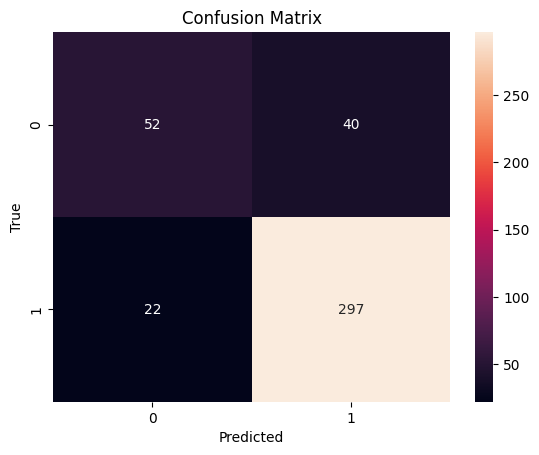

In [46]:
matrix = confusion_matrix(y_test, y_test_predicted)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_test_predicted))

# Decision Tree Confusion Matrix

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        92
           1       0.93      0.95      0.94       319

    accuracy                           0.91       411
   macro avg       0.87      0.86      0.86       411
weighted avg       0.91      0.91      0.91       411



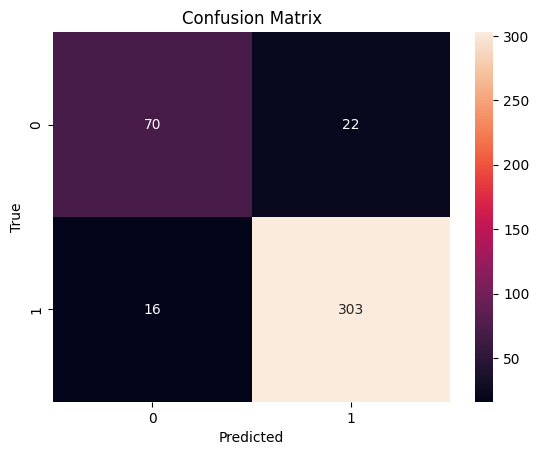

In [47]:
matrix = confusion_matrix(y_test, dt_scratch_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, dt_scratch_pred))

# Random Forest Confusion Matrix

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        92
           1       0.95      0.96      0.95       319

    accuracy                           0.93       411
   macro avg       0.90      0.89      0.90       411
weighted avg       0.93      0.93      0.93       411



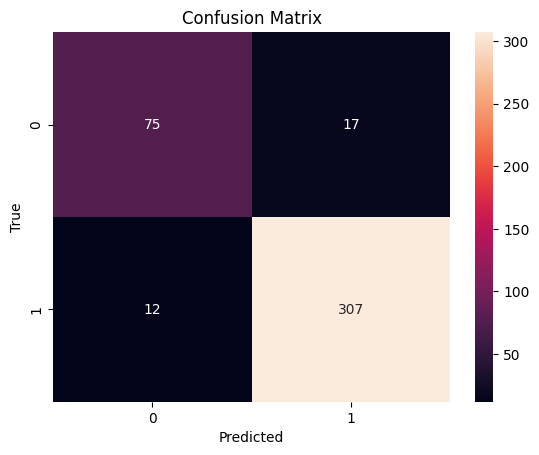

In [48]:
matrix = confusion_matrix(y_test, rf_scratch_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, rf_scratch_pred))

In [49]:
model_mae_scores_dict = {'SVM': 94.89, 'Decision Tree': 89.29, 'Random Forest' : 84.91}
model_mae_scores = pd.Series(model_mae_scores_dict)
model_mae_scores
order = model_mae_scores.sort_values()

Text(0.5, 1.0, 'Mean Average Error of All Models Tested')

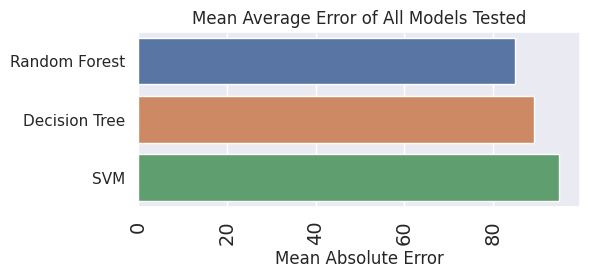

In [50]:
sns.set(rc={'figure.figsize':(5.7,2.27)})
sns.barplot(x=order.values, y = order.index, orient='h')

plt.xlabel('Mean Absolute Error')
plt.xticks(rotation='vertical',fontsize=14)
plt.title('Mean Average Error of All Models Tested')

In [52]:
import pickle
pickle.dump(dt_scratch,open('/content/model.pkl','wb'))

In [53]:
X_test

array([[8.14999443e-05, 5.05402156e-04, 1.13640312e-01, ...,
        4.83080352e-03, 3.98912058e-02, 4.01812689e-02],
       [3.50627486e-04, 2.36014336e-03, 1.22508908e-01, ...,
        9.15445317e-05, 2.71985494e-03, 3.32326284e-03],
       [1.65612457e-02, 5.27425267e-03, 3.42203887e-03, ...,
        6.09526101e-05, 6.25566636e-02, 6.25377644e-02],
       ...,
       [3.89981042e-04, 1.03119828e-01, 4.19747439e-02, ...,
        9.95643947e-06, 1.90389846e-02, 1.93353474e-02],
       [3.89473254e-04, 1.31463854e-02, 4.43106610e-01, ...,
        4.58853016e-05, 1.26926564e-02, 1.32930514e-02],
       [5.78878109e-04, 1.44094108e-01, 2.05624499e-01, ...,
        1.14542926e-05, 9.97280145e-03, 1.02719033e-02]])

In [54]:
type(X_test)

numpy.ndarray

In [55]:
X_test[0]

array([8.14999443e-05, 5.05402156e-04, 1.13640312e-01, 8.96413039e-04,
       4.74478311e-01, 6.11775211e-03, 5.53549654e-01, 8.57395807e-05,
       5.10772791e-02, 2.95103992e-01, 4.85960902e-02, 1.54769927e-02,
       4.85651991e-01, 1.43994023e-02, 2.46635045e-02, 3.23454923e-01,
       2.24739258e-02, 2.77246481e-03, 1.02167586e-01, 2.46623752e-03,
       1.81931353e-01, 4.37270480e-01, 4.62245600e-01, 1.87710508e-01,
       1.00000000e+00, 9.43682075e-02, 2.15125819e-01, 3.53226982e-01,
       2.65042880e-01, 2.95673184e-01, 1.39790532e-01, 3.51341507e-02,
       4.21803799e-01, 3.71722757e-04, 3.65879715e-01, 8.73379996e-02,
       7.21015740e-02, 1.06410756e-02, 4.12990840e-01, 9.74692060e-03,
       6.46045356e-03, 5.18628449e-04, 1.71643560e-01, 2.98831738e-01,
       1.66747668e-01, 1.25084911e-01, 6.41783259e-02, 6.08199896e-03,
       6.04386960e-02, 9.21225427e-04, 8.34413473e-03, 4.35549552e-03,
       1.52897113e-02, 6.02098907e-01, 5.19958595e-01, 8.56222131e-02,
      

In [60]:
upload_model = pickle.load(open('model.pkl','rb'))
y_test_prediction = upload_model.predict(X_test[0:2])

In [61]:
y_test_prediction

array([1, 1])

In [62]:
print(y_test_prediction[0])

1
